In [9]:
import json
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

#### 💾 Importar as metricas de todos os modelos

In [7]:
paths = glob("./predicts/*/metrics.json")

records = []
for path in paths:
    # extrai o nome do modelo a partir da pasta
    model_name = os.path.basename(os.path.dirname(path))
    # carrega o JSON
    with open(path, "r", encoding="utf-8") as f:
        metrics = json.load(f)
    # adiciona o nome do modelo ao dict
    metrics["model"] = model_name
    records.append(metrics)

# 2) Constrói um DataFrame
df_metrics = pd.DataFrame(records).set_index("model")

cols = ["MAE", "MSE", "RMSE", "MAPE"]
df_metrics = df_metrics[cols]

# 3) Exibe
print(df_metrics)

                       MAE       MSE      RMSE       MAPE
model                                                    
ARIMA             0.024986  0.000972  0.031170  47.821590
CNN               0.003369  0.000019  0.004376   7.553213
linearRegression  0.012407  0.000245  0.015647  27.478924
LSTM              0.003369  0.000019  0.004376   7.553213
RF                0.003369  0.000019  0.004376   7.553213
SVR               0.005430  0.000036  0.006014  11.541570
XARIMA            0.002502  0.000013  0.003554   5.555494


# 📊 Graficos para cada metrica

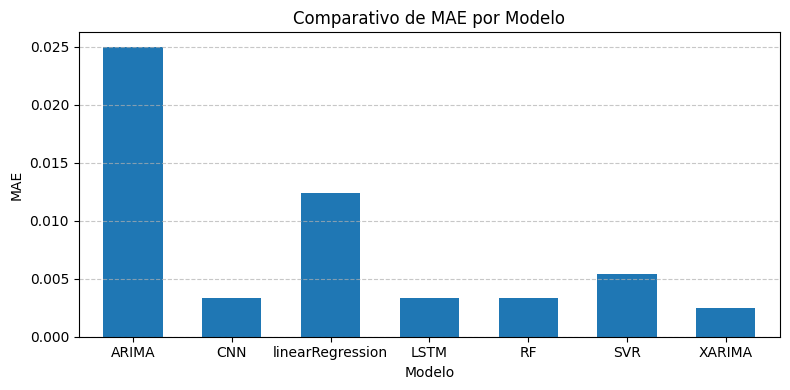

In [12]:
plt.figure(figsize=(8, 4))
df_metrics['MAE'].plot(
    kind="bar",
    rot=0,
    width=0.6
)
plt.title(f"Comparativo de MAE por Modelo")
plt.xlabel("Modelo")
plt.ylabel("MAE")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Ao acrescentar uma regressão CatBoost ao ARIMA (XARIMA), foi reduzido o erro em comparação ao ARIMA. Modelos de deep learning (CNN/LSTM) e RF também superam fortemente a RL, mas não chegam ao nível do XARIMA neste experimento.

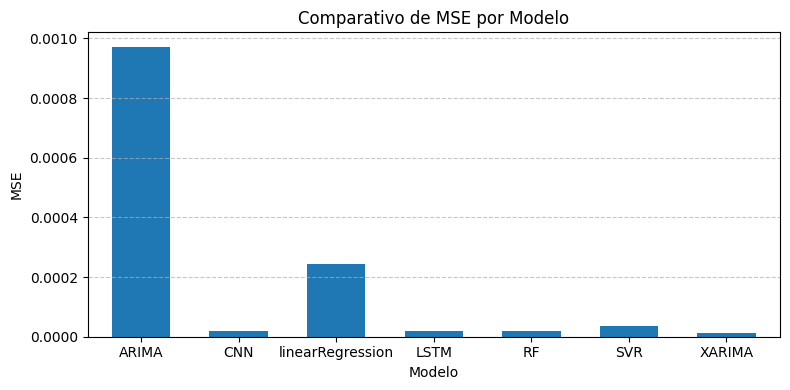

In [13]:
plt.figure(figsize=(8, 4))
df_metrics['MSE'].plot(
    kind="bar",
    rot=0,
    width=0.6
)
plt.title(f"Comparativo de MSE por Modelo")
plt.xlabel("Modelo")
plt.ylabel("MSE")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Pelo critério de MSE, XARIMA é o mais preciso, seguido de perto por CNN, LSTM e RF; ARIMA fica muito atrás.

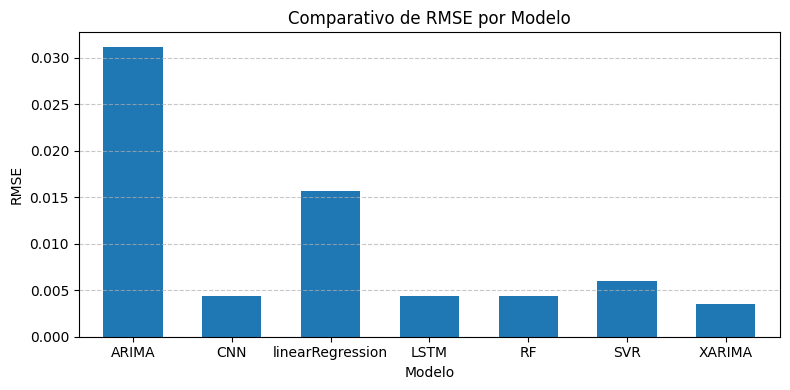

In [14]:
plt.figure(figsize=(8, 4))
df_metrics['RMSE'].plot(
    kind="bar",
    rot=0,
    width=0.6
)
plt.title(f"Comparativo de RMSE por Modelo")
plt.xlabel("Modelo")
plt.ylabel("RMSE")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

O RMSE reforça a superioridade do XARIMA no seu cenário, seguido pelo trio CNN/LSTM/RF, depois SVR, e por fim os modelos lineares mais simples (RL e ARIMA).

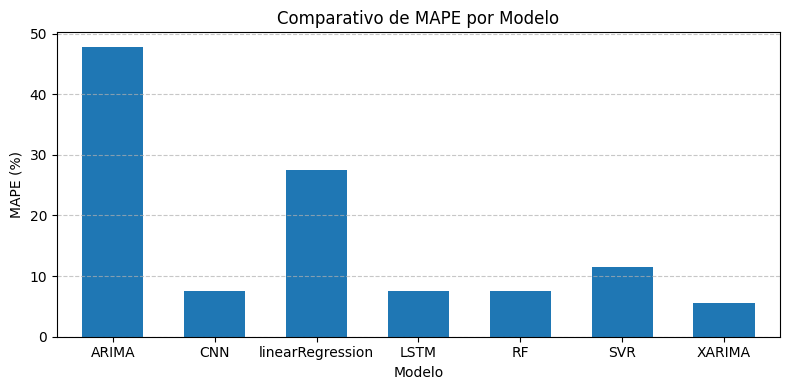

In [16]:
plt.figure(figsize=(8, 4))
df_metrics['MAPE'].plot(
    kind="bar",
    rot=0,
    width=0.6
)
plt.title(f"Comparativo de MAPE por Modelo")
plt.xlabel("Modelo")
plt.ylabel("MAPE (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

- XARIMA mostrou-se o melhor, com erro percentual médio abaixo de 6%.

- Modelos de ML/DL (CNN, LSTM, RF) também performaram muito bem, com MAPE ao redor de 7–8%.

- SVR foi intermediário (~12%), ainda útil mas abaixo dos demais.

- Modelos lineares puros (RL e ARIMA) ficaram com erros muito altos, especialmente o ARIMA, que tende a subestimar/atrasar mudanças de curto prazo.